Epoch: 0050 cost= 0.588087797 W= 0.6490735 b= -2.0723624
Epoch: 0100 cost= 0.529067159 W= 0.6253143 b= -1.9014409
Epoch: 0150 cost= 0.476861179 W= 0.6029687 b= -1.7406878
Epoch: 0200 cost= 0.430681199 W= 0.5819514 b= -1.589492
Epoch: 0250 cost= 0.389833182 W= 0.5621845 b= -1.44729
Epoch: 0300 cost= 0.353701383 W= 0.5435933 b= -1.3135463
Epoch: 0350 cost= 0.321740627 W= 0.5261075 b= -1.1877546
Epoch: 0400 cost= 0.293470830 W= 0.5096621 b= -1.069448
Epoch: 0450 cost= 0.268464535 W= 0.49419463 b= -0.95817554
Epoch: 0500 cost= 0.246345893 W= 0.47964707 b= -0.85352206
Epoch: 0550 cost= 0.226780921 W= 0.4659646 b= -0.7550913
Epoch: 0600 cost= 0.209475398 W= 0.45309618 b= -0.66251624
Epoch: 0650 cost= 0.194167972 W= 0.44099277 b= -0.57544583
Epoch: 0700 cost= 0.180628389 W= 0.42960948 b= -0.49355474
Epoch: 0750 cost= 0.168652266 W= 0.41890308 b= -0.4165337
Epoch: 0800 cost= 0.158059344 W= 0.40883344 b= -0.34409377
Epoch: 0850 cost= 0.148689747 W= 0.39936265 b= -0.27596176
Epoch: 0900 cost= 0.

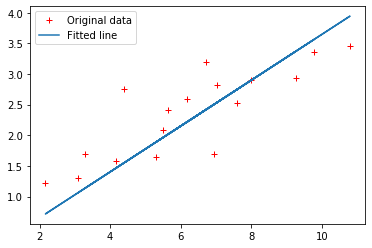

Testing... (Mean square loss Comparison)
Testing cost= 0.1096323
Absolute mean square loss difference: 0.01695624


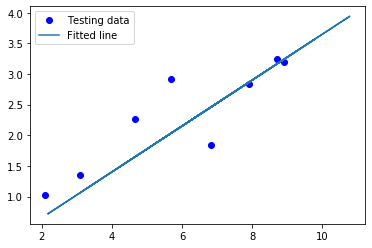

In [0]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y}) # feed_dict參數的作用是替換的optimizer中的tensor值。

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [0]:
!pip install numpy

In [0]:
import torch

In [0]:
a = torch.Tensor([1,2,3,4])
a

tensor([1., 2., 3., 4.])

In [0]:
print(train_X)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
